# Mediation-Agreements Data Explorer



In [17]:
__author__      = 'Roy Gardner'

%run ./mediation_functions.py


## Load the mediation-actor data

- Load data into a biadjacency matrix with mediations in rows and actors in columns
- Matrix values are zero except where a relation between a mediation and an actor exists where the value is an non-zero integer that codes the mediation-actor edge properties.
- Apart from the matrix other data are extracted or computed.
- All data are stored in data_dict




In [31]:

data_path = './data/'
mediation_file = 'mediation.csv'
actors_file = 'actors.csv'

data_dict = load_mediation_data(mediation_file,actors_file,data_path)

print(data_dict['header'])


['year', 'mediation ID', 'negotiation ID', 'conflict locale', 'conflict sub-locale', 'locale Gleditsch ID', 'third-party', 'third-party Gleditsch ID', 'location of neogitations', 'negotiation location Gleditsch ID', 'negotiation type', 'leading actor', 'leading actor 2', 'leading actor 3', 'good offices', 'mediation', 'hosting talks', 'negotiating and drafting', 'manipulating', 'humanitarian', 'witness/party to agreement', 'other', 'agreement', 'peace agreement', 'ceasfire agreement', 'agreement name', 'notes_1', 'source_1', 'note_2', 'source_2', 'note_3', 'source_3', 'note_4', 'source_4', 'note_5', 'source_5', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', '']


## Extract sub-matrix for mediations that result in agreement

(57, 46)


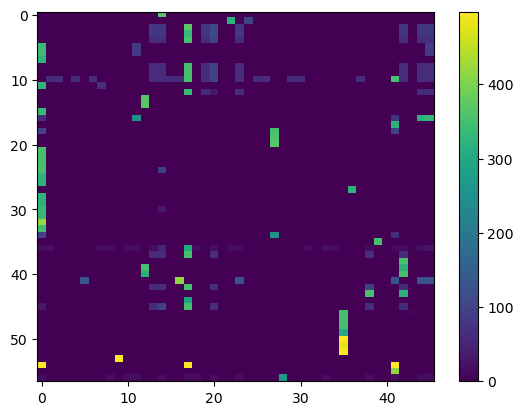

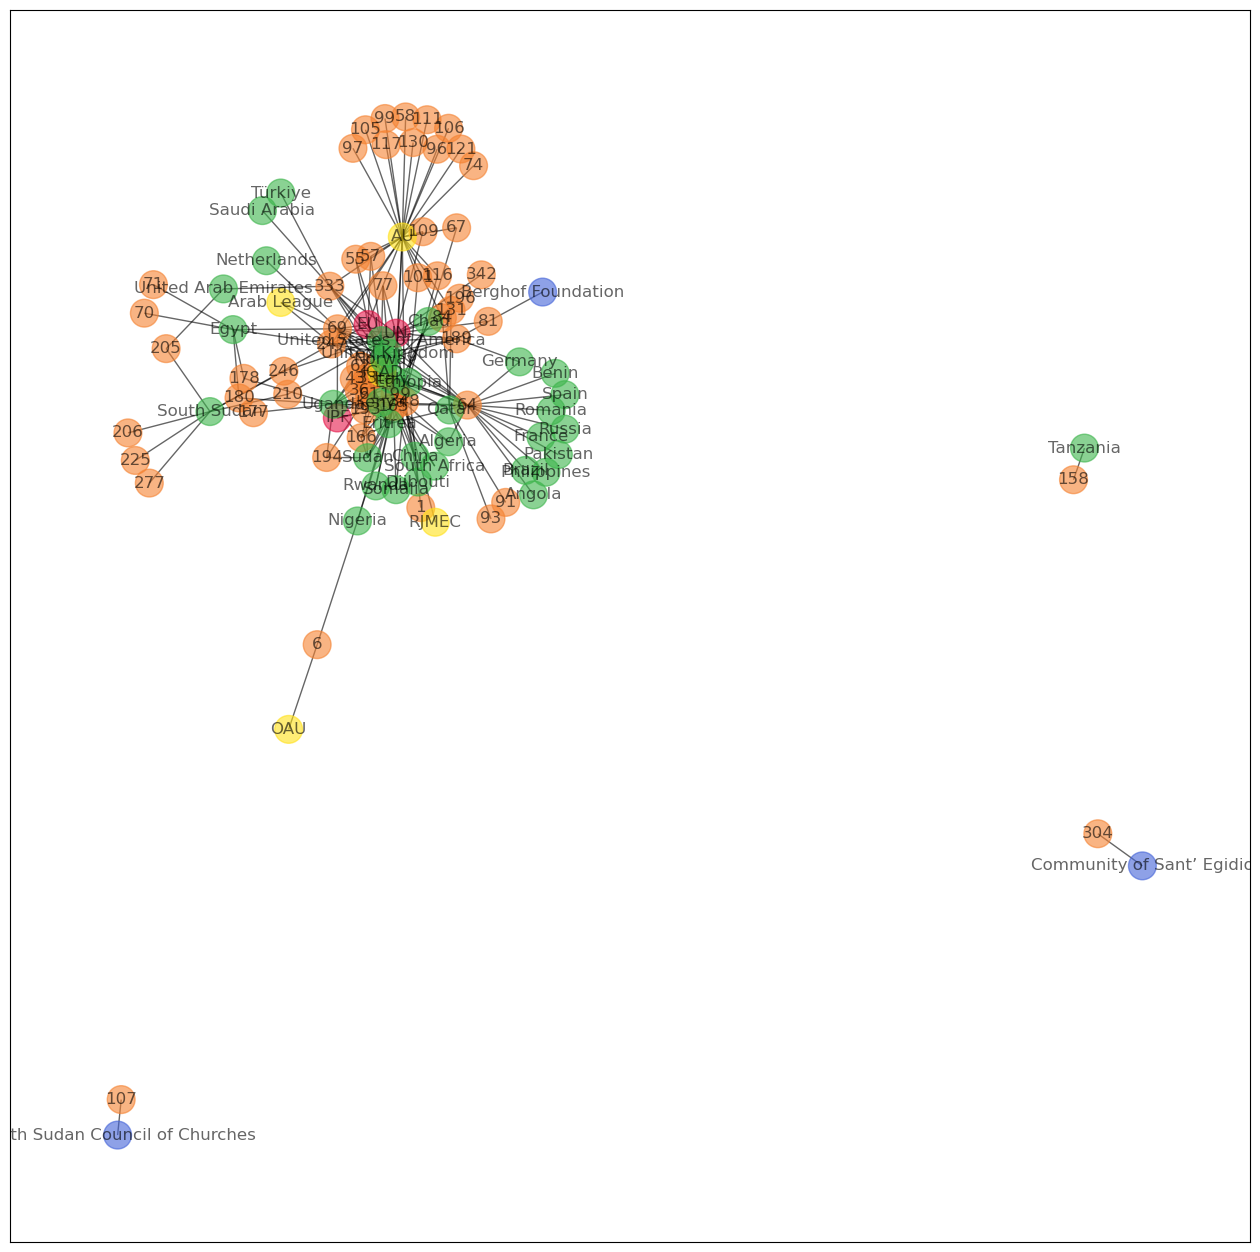

In [84]:
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
# Get mediation vertices

peace_mediation_ids = [k for k,v in data_dict['vertices_dict'].items() if v['type'] == 'MED' and\
                  v['data']['peace_agreement'] == 1]


peace_mediation_indices = [data_dict['mediation_vertices'].index(v) for v in peace_mediation_ids]


peace_matrix = data_dict['matrix'][np.ix_(peace_mediation_indices,range(0,len(data_dict['actor_vertices'])))]

# Get columns containing non-zero value
indices = np.where(peace_matrix > 0)
peace_actor_indices = list(set(indices[1]))

peace_matrix = peace_matrix[np.ix_(range(0,peace_matrix.shape[0]),peace_actor_indices)]
print(peace_matrix.shape)

peace_actor_ids = [data_dict['actor_vertices'][index] for index in peace_actor_indices]


peace_dict = {}
peace_dict['matrix'] = peace_matrix
peace_dict['mediation_vertices'] = peace_mediation_ids
peace_dict['actor_vertices'] = peace_actor_ids

plt.imshow(peace_matrix,aspect='auto')
plt.colorbar()
plt.show()

adjacency_matrix,adj_vertices = adjacency_from_biadjacency(peace_dict)
bin_matrix = (adjacency_matrix > 0).astype(np.int8)


node_labels = {i:v for i,v in enumerate(adj_vertices)}
node_colors = [data_dict['color_map'][data_dict['vertices_dict']\
                                      [vertex_id]['type']] for vertex_id in adj_vertices]

graph = nx.from_numpy_array(bin_matrix, create_using=nx.Graph)
f = plt.figure(figsize=(16,16))
pos = nx.spring_layout(graph) 
nx.draw_networkx(graph,pos,labels=node_labels,node_color=node_colors,\
                 node_size=400,font_size=12,alpha=0.6)
plt.grid(False)
plt.show()


## Not all actors engage in mediations that result in an agreement

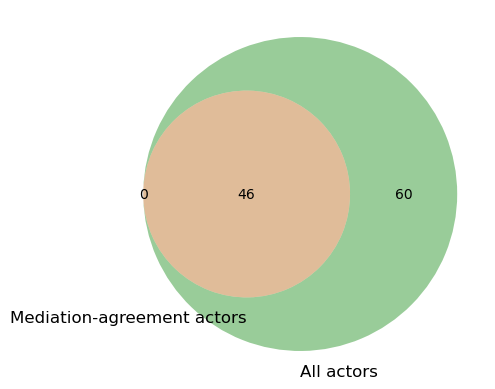

{'Japan', 'Estonia', 'South Sudanese Church Leaders', 'Abyei businessmen', 'Christian Relief', 'Islamic Development Bank', 'ICC', 'The Native Administration', 'James Ellery', 'Equatorial Guinea', 'Ireland', 'Switzerland', 'Gabon', 'The Republic of Korea', 'Greece', 'Carter Center', 'Malta', 'Czechia', 'Zimbabwe', 'Finland', 'African Development Bank', 'NGO consortium', 'Slovenia', 'Fashoda Relief', 'Denmark', 'Lesotho', 'Episcopal Church of Sudan', 'Equatorian Church Leaders', 'IMF', 'African Diplomatic Corps', 'Sierra Leone', 'World Bank', 'Portugal', 'Ghana', 'Hungary', 'PAX', 'Belgium', 'Sweden', 'Poland', 'Libya', 'Abel Alier', 'ICRC', 'Local Murle elites', 'Croatia', 'Norwegian Church Aid', 'Kuwait', 'ACCORD', 'The Peaceful Co-Existence Committee', 'Lithuania', 'Shilluk reth', 'Togo', 'Arab Fund for Social Development', 'Canada', 'National Democratic Institute', 'South Sudanese religious leaders', 'CTSAMVM', 'Burundi', 'Morocco', 'Liberia', 'Darfur Security Committee'}


In [85]:
venn2([set(peace_actor_ids),set(data_dict['actor_vertices'])],['Mediation-agreement actors','All actors'])
plt.show()

print(set(data_dict['actor_vertices']).difference(set(peace_actor_ids)))


## Lead actor analysis

In [106]:
def plot_birectional(left,right,titles,max_x=0,labelled=False,file=''):
    """
    Plot a bidirectional graph with constitution section percentages on left and responses on right.
    x-axis is percentage of above-threshold sections or responses above-threshold for a topic or category
    y-axis is topic or category label (for all topics the label is the topic ID and is not shown)
    The left and right data sets must be the same length.
    param left: Data tuples (label,value) for the left side.
    param right: Data tuples (label,value) for the right side
    param titles: Left and right titles in a list [<left_title>,<right__title>]
    param max_x: Use to manually set the max_x value. If 0 defaults to maximum x + 1 of data series values
    param labelled: If True then display data tuple lables on the y-axis, otherwise just use integer 
    values over range of data
    """
    maxs = [] 
    maxs.append(max([t[1] for t in left]))
    maxs.append(max([t[1] for t in right]))

    if max_x == 0:
        max_x = int(max(maxs))+1
    else:
        max_x = max_x

    font_color = '#525252'
    facecolor = '#eaeaf2'
    color_red = '#fd625e'
    color_blue = '#01b8aa'
    index = list(range(0,len(left)))
    column0 = [t[1] for t in left]
    column1 = [t[1] for t in right]
    title0 = titles[0]
    title1 = titles[1]

    fig, axes = plt.subplots(figsize=(10,14), ncols=2, sharey=False)
    fig.tight_layout()

    axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
    axes[0].set_title(title0, fontsize=16, pad=15, color=color_red)
    axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
    axes[1].set_title(title1, fontsize=16, pad=15, color=color_blue)

    axes[0].invert_xaxis() 
    #plt.gca().invert_yaxis()

    plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

    axes[0].set_xticks(list(range(0,max_x+5,10)))
    axes[1].set_xticks(list(range(0,max_x+5,10)))
    axes[1].set_yticks([])

    if labelled:
        axes[0].set_yticks(range(0,len(left)))
        axes[0].set_yticklabels([t[0] for t in left])
    else:
        axes[0].set_ylabel('Topic index',fontsize='x-large',)
        

    axes[0].tick_params(labelsize='x-large')
    axes[1].tick_params(labelsize='x-large')
    #axes[0].set_ylabel('Ranked topics',fontsize='xx-large')
    axes[0].set_xlabel('Number of mediations',fontsize='x-large',)
    axes[1].set_xlabel('Number of mediations',fontsize='x-large',)

    #axes[0].xaxis.set_label_coords(1.025, -0.055)
    if len(file) > 0:
        plt.savefig('./figures/' + file + '.tif',dpi=300,bbox_inches='tight')
    plt.show()


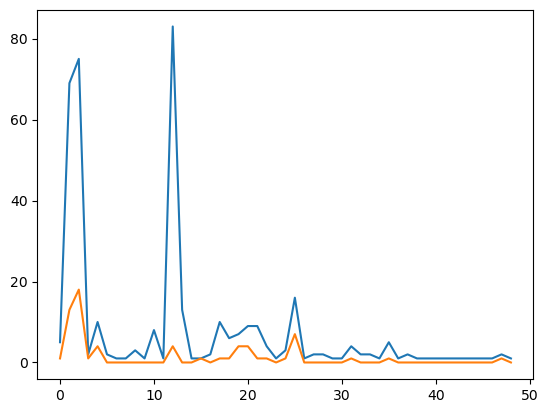

PearsonRResult(statistic=0.8186024477084947, pvalue=6.72854176702811e-13)


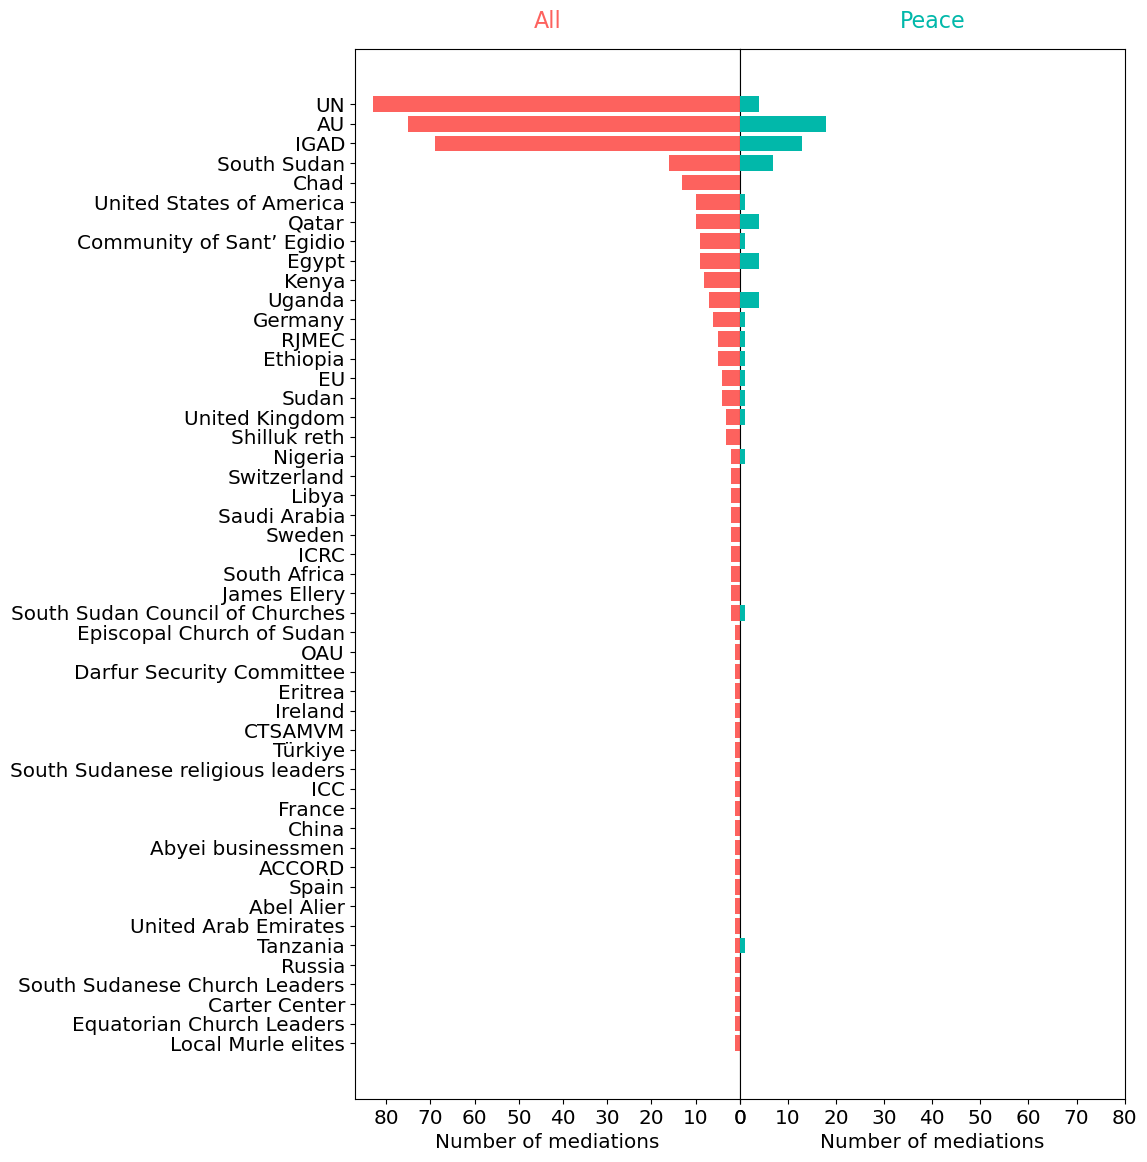

In [111]:
# Collect lead actors from all edges
indices = np.where(data_dict['matrix'] > 0)

lead_counts = {}

for i in range(0,len(indices[0])):
    mediation_index = indices[0][i]
    actor_index = indices[1][i]
    actor_id = data_dict['actor_vertices'][actor_index]
    edge_weight = data_dict['matrix'][mediation_index,actor_index]
    edge_dict = recover_edge_dict(edge_weight,len(get_empty_edge_dict()))
    if int(edge_dict['is_lead']) == 1:
        if actor_id in lead_counts:
            lead_counts[actor_id][0] += 1
        else:
            lead_counts[actor_id] = [1,0]
    
# Collect lead actors from peace matrix
indices = np.where(peace_dict['matrix'] > 0)

for i in range(0,len(indices[0])):
    mediation_index = indices[0][i]
    actor_index = indices[1][i]
    actor_id = peace_dict['actor_vertices'][actor_index]
    edge_weight = peace_dict['matrix'][mediation_index,actor_index]
    edge_dict = recover_edge_dict(edge_weight,len(get_empty_edge_dict()))
    if int(edge_dict['is_lead']) == 1:
        if actor_id in lead_counts:
            lead_counts[actor_id][1] += 1
        else:
            lead_counts[actor_id] = [0,1]

plt.plot([v[0] for _,v in lead_counts.items()])
plt.plot([v[1] for _,v in lead_counts.items()])
plt.show()

print(stats.pearsonr([v[0] for _,v in lead_counts.items()],[v[1] for _,v in lead_counts.items()]))

sorted_leads = sorted(lead_counts.items(),key=lambda kv:kv[1][0])

plot_birectional([(t[0],t[1][0]) for t in sorted_leads],[(t[0],t[1][1]) for t in sorted_leads],\
                 ['All','Peace'],max_x=0,labelled=True,file='')


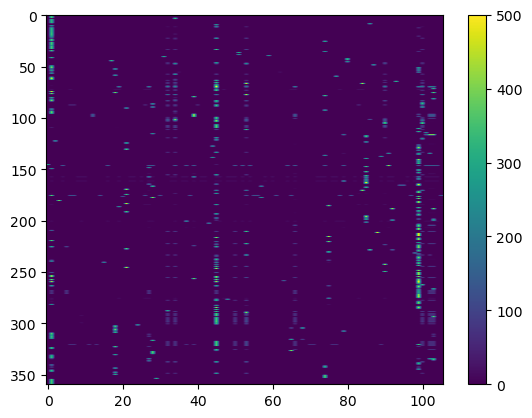

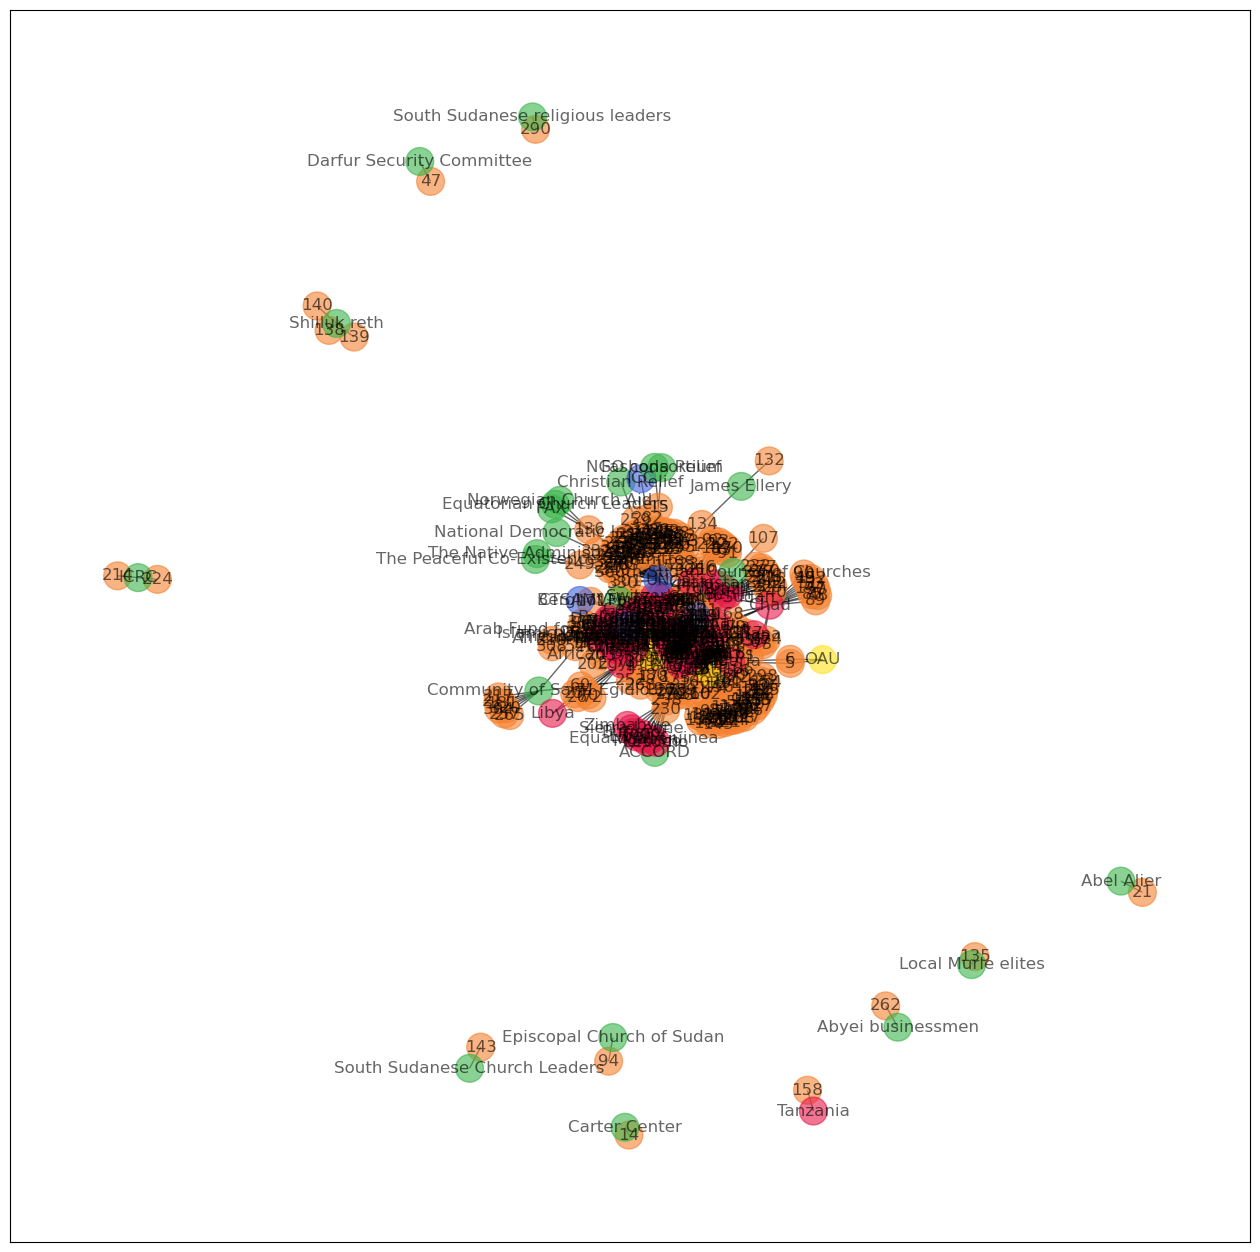

In [3]:
%run ./mediation_functions.py


plt.imshow(data_dict['matrix'],aspect='auto')
plt.colorbar()
plt.show()

adjacency_matrix,adj_vertices = adjacency_from_biadjacency(data_dict)
bin_matrix = (adjacency_matrix > 0).astype(np.int8)

draw_networkx_graph(bin_matrix,adj_vertices,data_dict)


## Query Network

- Example here queries the network for actors.



['Netherlands', 'Germany', 'Italy']


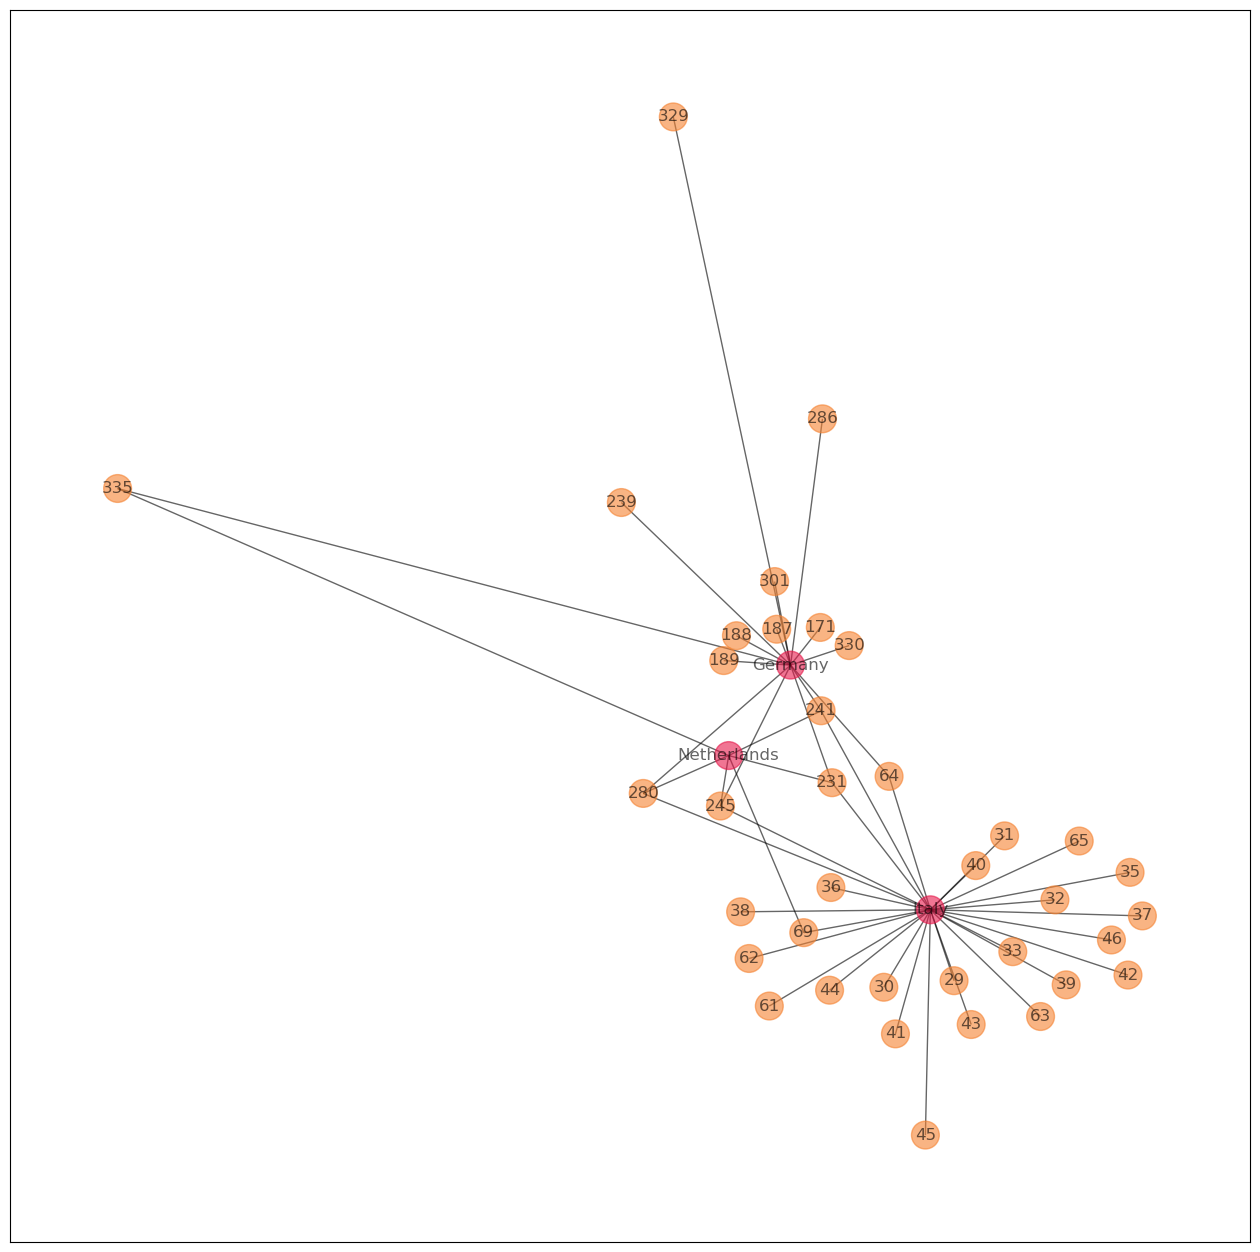

In [4]:
%run ./mediation_functions.py

# Convert a peace process biadjacency matrix to an adjacency matrix
adj_matrix,adj_vertices = adjacency_from_biadjacency(data_dict)

operator = 'OR'

query_vertices = ['Netherlands']
query_vertices = ['IGAD','UN']
query_vertices = ['Netherlands','United States of America']
query_vertices = ['Netherlands','Germany','Italy']
print()
print(query_vertices)

query_indices = [adj_vertices.index(vertex) for vertex in query_vertices]
query_matrix,found_indices = get_query_matrix(query_indices,adj_matrix,operator=operator)
found_vertices = [adj_vertices[index] for i,index in enumerate(found_indices)]


draw_networkx_graph(query_matrix,found_vertices,data_dict)



## Network time series

2022


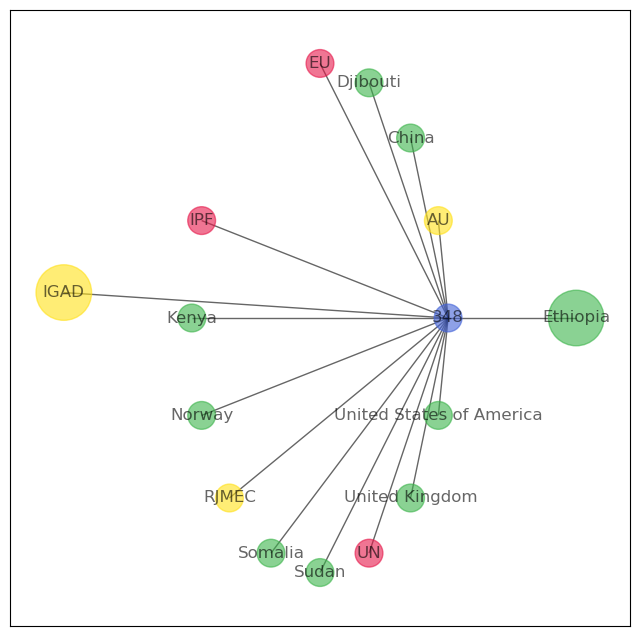

In [7]:
from IPython.display import clear_output
import time

def display_networkx_graph_ts(actor_ids,query_matrix,vertex_indices,adj_vertices,data_dict,title='',file=''):
    node_labels = {}
    node_sizes = []
    for i,index in enumerate(vertex_indices):
        node_id = adj_vertices[index]
        node_labels[i] = node_id
        
        if node_id == actor_ids[0]:
            left_node = i
            node_sizes.append(1600)
        elif node_id == actor_ids[1]:
            right_node = i
            node_sizes.append(1600)
        else:
            node_sizes.append(400)
        
    found_ids = [adj_vertices[index] for i,index in enumerate(found_indices)]
    node_colors = [data_dict['color_map'][data_dict['vertices_dict']\
                                          [vertex_id]['type']] for vertex_id in found_ids]
    
    graph = nx.from_numpy_array(query_matrix, create_using=nx.Graph)
    f = plt.figure(figsize=(8,8))
    pos = nx.circular_layout(graph)
    
    pos[left_node] = np.array([-2,0.1])
    pos[right_node] = np.array([2,0])

    nx.draw_networkx(graph,pos,labels=node_labels,node_color=node_colors,node_size=node_sizes,\
                     font_size=12,alpha=0.6)
    plt.grid(False)
    plt.title(title,fontsize='xx-large')
    if len(file) > 0:
        plt.savefig('../../outputs/' + file + '.png', bbox_inches='tight')
    plt.show()

def get_joint_mediations(actor_ids,data_dict):
    """
    Given a list of actors get the mediations in common
    param actor_ids: List of actor IDs
    param data_dict: Mediations data dictionary
    return: List of mediations in which actors are engaged
    """
    # Given a list of actors get the mediations in common
    if len(actor_ids) < 2:        
        return []
    for actor_id in actor_ids:
        if not actor_id in data_dict['actor_vertices']:
            return []
    actor_indices = [data_dict['actor_vertices'].index(actor_id) for actor_id in actor_ids]
    for i,actor_index in enumerate(actor_indices):
        row = data_dict['matrix'].T[actor_index]
        if i == 0:
            mediation_bitset = row
        else:
            mediation_bitset = np.bitwise_and(mediation_bitset,row)
    mediation_ids = []
    for index,value in enumerate(mediation_bitset): 
        if value > 1:
            mediation_ids.append(data_dict['mediation_vertices'][index])
    return mediation_ids

# Decide on an actor
actor_ids = ['IGAD','UN']
actor_ids = ['IGAD','Ethiopia']
#actor_ids = ['AU','Ethiopia']
mediation_ids = get_joint_mediations(actor_ids,data_dict)

all_mediations = False

if all_mediations:
    # Get all mediations for our dates
    dates = []
    for mediation_id in mediation_ids:
        dates.append(data_dict['vertices_dict'][mediation_id]['data']['year'])

    # Get all mediations for a given date
    dates_dict = {}
    for mediation_id in data_dict['mediation_vertices']:
        date = data_dict['vertices_dict'][mediation_id]['data']['year']
        if not date in dates:
            continue
        if date in dates_dict:
            dates_dict[date].append(mediation_id)
        else:
            dates_dict[date]= [mediation_id]
else:        
    # Get dates of joint mediations only
    dates_dict = {}
    for mediation_id in mediation_ids:
        date = data_dict['vertices_dict'][mediation_id]['data']['year']
        if date in dates_dict:
            dates_dict[date].append(mediation_id)
        else:
             dates_dict[date]= [mediation_id]   
        
dates = sorted(dates_dict.items(),key=lambda kv:kv[0])

adj_matrix,adj_vertices = adjacency_from_biadjacency(data_dict)

for t in dates:
    print(t[0])
    mediation_ids = t[1]
    mediation_indices = [data_dict['mediation_vertices'].index(mediation_id) for\
                         mediation_id in mediation_ids]
    actor_indices = []
    for mediation_index in mediation_indices:
        actor_indices.extend([index for index,v in enumerate(data_dict['matrix'][mediation_index]) if\
                                  v>1])
        actor_indices = list(set(actor_indices))
    
    all_actor_ids = [data_dict['actor_vertices'][index] for index in actor_indices]
    
    query_vertices = []
    query_vertices.extend(all_actor_ids)
    query_vertices.extend(mediation_ids)
    query_indices = [adj_vertices.index(vertex) for vertex in query_vertices]
    query_matrix,found_indices = get_query_matrix(query_indices,adj_matrix,operator='AND')
    
    display_networkx_graph_ts(actor_ids,query_matrix,found_indices,adj_vertices,data_dict,title='',file='')
    time.sleep(2)
    clear_output(wait=True)



## Actor engagements over time

(106, 360)


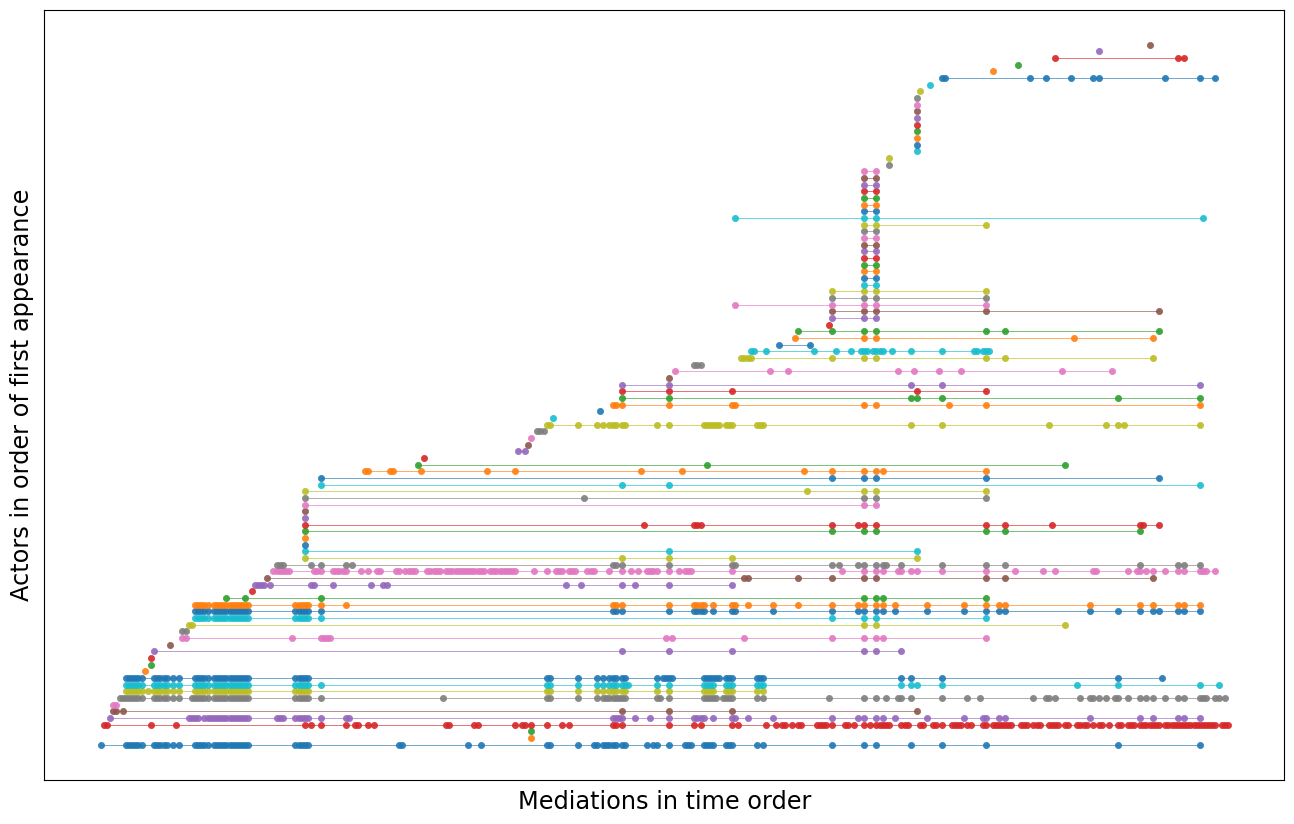

In [8]:
#print(data_dict['dates_dict'])

#print(pp_data_dict['pp_agreement_ids'])
mediation_ids = data_dict['mediation_vertices']

t_list = []
for i,mediation_id in enumerate(mediation_ids):
    mediation_date = data_dict['vertices_dict'][mediation_id]['data']['year']
    t_list.append((i,mediation_date))
# Sort by date    
t_list = sorted(t_list,key=lambda t:t[1])

# Build a time-order mediation-actor matrix
ordered_matrix = []
for t in t_list:
    ordered_matrix.append(data_dict['matrix'][t[0]])
    
ordered_matrix = np.array(ordered_matrix)
# Put actors in rows
ordered_matrix = ordered_matrix.T

print(ordered_matrix.shape)

# Now order actors by first appearance in process
row_indices = []
for i,row in enumerate(ordered_matrix):
    where = np.where(row>1)
    v = 0
    if len(where[0]) > 0:
        v = where[0][0]
    row_indices.append((i,v))
sorted_row_indices = [t[0] for t in sorted(row_indices,key=lambda t:t[1])]

sorted_matrix = ordered_matrix[np.ix_(sorted_row_indices)]

f = plt.figure(figsize=(16,10))
for i,row in enumerate(sorted_matrix):
    x = [j for j,x in enumerate(row) if x > 0]
    y = [i]*len(x)
    plt.scatter(x,y,alpha=0.9,linewidth=0.5,s=20)
    plt.plot(x,y,alpha=0.9,linewidth=0.5)
xint = range(0, sorted_matrix.shape[1])
plt.xticks([],fontsize='xx-large')    
yint = range(0, sorted_matrix.shape[1])
plt.yticks([],fontsize='xx-large')    
plt.ylabel('Actors in order of first appearance',fontsize='xx-large')
plt.xlabel('Mediations in time order',fontsize='xx-large')
plt.show()



## Actor co-occurrence

- Find mediations in common for pairs of actors


(106, 106)


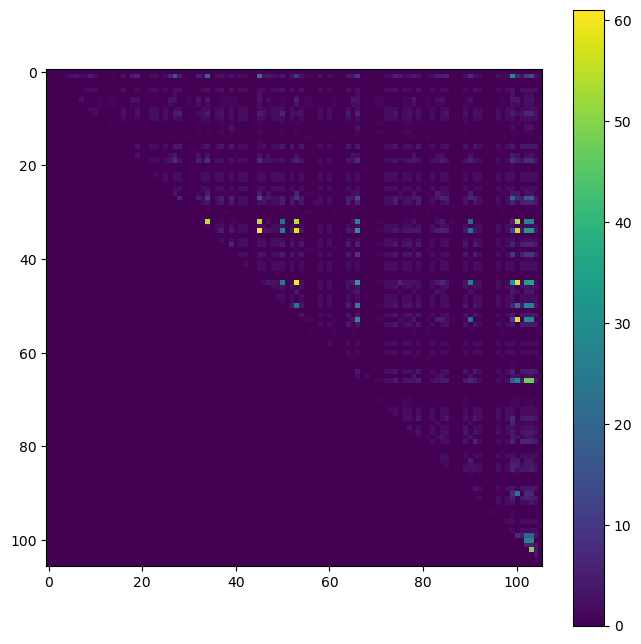

(34, 45)
Actors who are co-mediators to the greatest number of mediations: ['Ethiopia', 'IGAD']
Number of mediations: 61



In [22]:
%run ./mediation_functions.py

# Get the co-occurrence matrix
co_matrices = get_cooccurrence_matrices(data_dict['matrix'])

actor_upper = np.triu(co_matrices[0],k=1)
print(actor_upper.shape)

f = plt.figure(figsize=(8,8))
plt.imshow(actor_upper)
plt.colorbar()
plt.show()

# Actors with max mediations between them
indices = np.unravel_index(np.argmax(actor_upper,axis=None),actor_upper.shape)
print(indices)
actors = [data_dict['actor_vertices'][index] for index in indices]
print('Actors who are co-mediators to the greatest number of mediations:',actors)
print('Number of mediations:',actor_upper[indices])
print()


### Recover co-occurence data

In [21]:
actors = [data_dict['actor_vertices'][index] for index in indices]
actor_indices = [data_dict['actor_vertices'].index(actor_id) for actor_id in actors]

# Number in co-occurrence cell
#print(co_matrices[0][actor_indices[0]][actor_indices[1]])

bin_matrix = (data_dict['matrix'] > 1).astype(np.int8)
# Get the row from the transpose of pp matrix
row1 = bin_matrix.T[actor_indices[0]]
# Get row 2 from the matrix
row2 = bin_matrix.T[actor_indices[1]]

x = np.bitwise_and(row1,row2)

mediation_data = []
for index,value in enumerate(x): 
    if value == 1:
        mediation_id = data_dict['mediation_vertices'][index]
        mediation_data.append((index,mediation_id,data_dict['vertices_dict'][mediation_id]['data']))
mediation_data = sorted(mediation_data, key=lambda t:t[2]['year'])

print(len(mediation_data))
print()
for data in mediation_data[0:10]:
    index = data[0]
    edge_dict_1 =\
        recover_edge_dict(data_dict['matrix'][index,actor_indices[0]],len(get_empty_edge_dict()))
    edge_dict_2 =\
        recover_edge_dict(data_dict['matrix'][index,actor_indices[1]],len(get_empty_edge_dict()))

    print(data[1],data[2])
    print(actors[0],edge_dict_1)
    print(actors[1],edge_dict_2)
    print()


61

10 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
Ethiopia {'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}
IGAD {'is_lead': '1', 'good_offices': '0', 'mediation': '1', 'hosting': '1', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

11 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
Ethiopia {'is_lead': '0', 'good_offices': '0', 'mediation': '0', 'hosting': '0', 'negotiating': '1', 'manipulating': '1', 'humanitarian': '0', 'witness': '0', 'other': '0'}
IGAD {'is_lead': '1', 'good_offices': '0', 'mediation': '0', 'hosting': '1', 'negotiating': '1', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

12 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
Ethiopia {'is_lead': '0', 'good_offices'

### Roles heatmap for a pair of actors

How are roles distributed between a pair of co-occurrence actors?


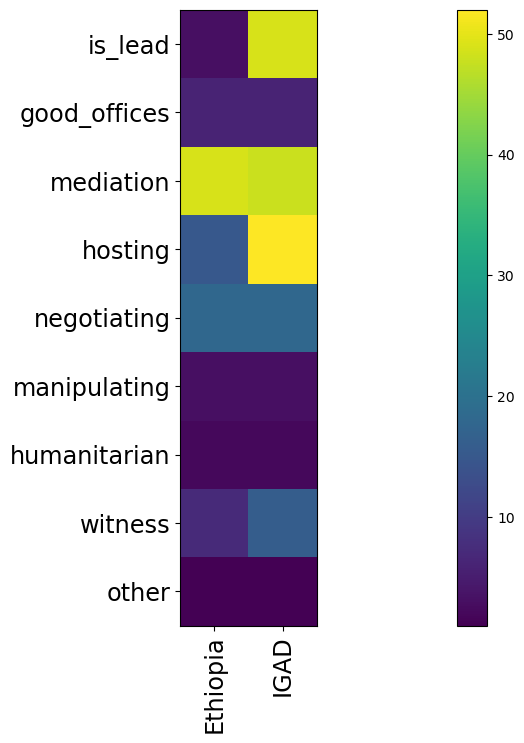

In [14]:
actors = [data_dict['actor_vertices'][index] for index in indices]
actor_indices = [data_dict['actor_vertices'].index(actor_id) for actor_id in actors]

# Number in co-occurrence cell
#print(co_matrices[0][actor_indices[0]][actor_indices[1]])

bin_matrix = (data_dict['matrix'] > 1).astype(np.int8)
# Get the row from the transpose of pp matrix
row1 = bin_matrix.T[actor_indices[0]]
# Get row 2 from the matrix
row2 = bin_matrix.T[actor_indices[1]]

x = np.bitwise_and(row1,row2)

mediation_data = []
for index,value in enumerate(x): 
    if value == 1:
        mediation_id = data_dict['mediation_vertices'][index]
        mediation_data.append((index,mediation_id,data_dict['vertices_dict'][mediation_id]['data']))
mediation_data = sorted(mediation_data, key=lambda t:t[2]['year'])

# Build matrix with roles in columns and actors in columns
e_dict = get_empty_edge_dict()

role_keys = list(e_dict.keys())

roles_matrix = np.zeros([len(e_dict),2]).astype(np.int_)

for data in mediation_data:
    index = data[0]
    edge_dict_1 = recover_edge_dict(data_dict['matrix'][index,actor_indices[0]],len(e_dict))
    values = list(edge_dict_1.values())
    for i,v in enumerate(values):
        roles_matrix[i,0] += int(v)
        
    edge_dict_2 = recover_edge_dict(data_dict['matrix'][index,actor_indices[1]],len(e_dict))
    values = list(edge_dict_2.values())
    for i,v in enumerate(values):
        roles_matrix[i,1] += int(v)

f = plt.figure(figsize=(36,8))
plt.imshow(roles_matrix)
plt.colorbar()
plt.yticks(range(0,len(role_keys)),role_keys,fontsize='xx-large')
plt.xticks(range(0,len(actors)),actors,fontsize='xx-large',rotation=90)
plt.show()


## Actor data

### Mediations

In [15]:
# Recover the mediations and the edge data
actor_id = 'IGAD'
print('Mediation engagements for:',actor_id, data_dict['vertices_dict'][actor_id]['type'])
mediation_data = get_mediations(actor_id,data_dict)
mediation_data = sorted(mediation_data, key=lambda t:t[2])
print('Total mediation engagements:',len(mediation_data))

k = 0
for t in mediation_data:
    edge_dict = recover_edge_dict(t[1],len(get_empty_edge_dict()))
    values = list(edge_dict.values())
    for i,v in enumerate(values):
        k += int(v)
print('Total mediation roles:',k)
print()

for t in mediation_data[0:10]:
    print(t[0],data_dict['vertices_dict'][t[0]]['data'])
    edge_dict = recover_edge_dict(t[1],len(get_empty_edge_dict()))
    print(edge_dict)
    print()



Mediation engagements for: IGAD R
Total mediation engagements: 100
Total mediation roles: 296

358 {'year': '1993', 'conflict_locale': 'Sudan', 'neg_location': 'Ethiopia', 'neg_type': 'R'}
{'is_lead': '1', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '1', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

7 {'year': '1993', 'conflict_locale': 'Sudan', 'neg_location': 'Nigeria', 'neg_type': 'R'}
{'is_lead': '0', 'good_offices': '1', 'mediation': '1', 'hosting': '0', 'negotiating': '1', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

10 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
{'is_lead': '1', 'good_offices': '0', 'mediation': '1', 'hosting': '1', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}

11 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}
{'is_lead': '1', 'good_offices': '0', 'mediat

### Roles

- Mediation roles of actor
- Aggregated over years


Mediation engagements for: IGAD R
Total mediation engagements: 100
Total mediation roles: 296



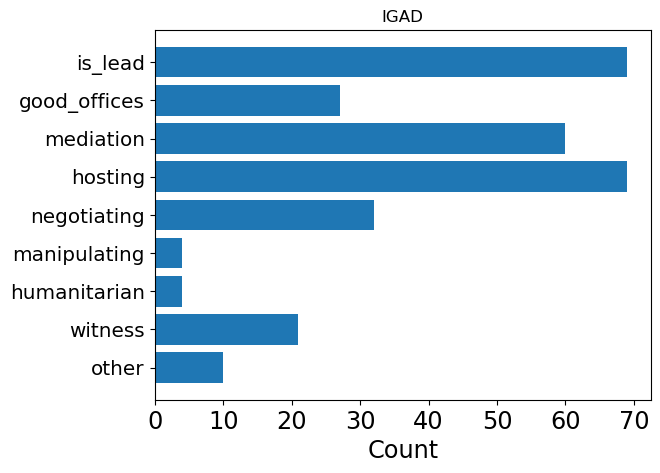

In [16]:

actor_id = 'IGAD'
print('Mediation engagements for:',actor_id, data_dict['vertices_dict'][actor_id]['type'])
mediation_data = get_mediations(actor_id,data_dict)
mediation_data = sorted(mediation_data, key=lambda t:t[2])
print('Total mediation engagements:',len(mediation_data))
role_counts = [0]*len(get_empty_edge_dict())

for t in mediation_data:
    edge_dict = recover_edge_dict(t[1],len(get_empty_edge_dict()))
    values = list(edge_dict.values())
    for i,v in enumerate(values):
        role_counts[i] += int(v)

print('Total mediation roles:',sum(role_counts))
print()

plt.barh(range(0,len(role_counts)),role_counts)
plt.yticks(range(0,len(role_keys)),role_keys,fontsize='x-large')
plt.gca().invert_yaxis()
plt.xticks(fontsize='xx-large')
plt.xlabel('Count',fontsize='xx-large')
plt.title(actor_id)
plt.show()


### Year

- Mediation engagements per year for actor
- Keep same actor ID


Total mediation engagements: 100


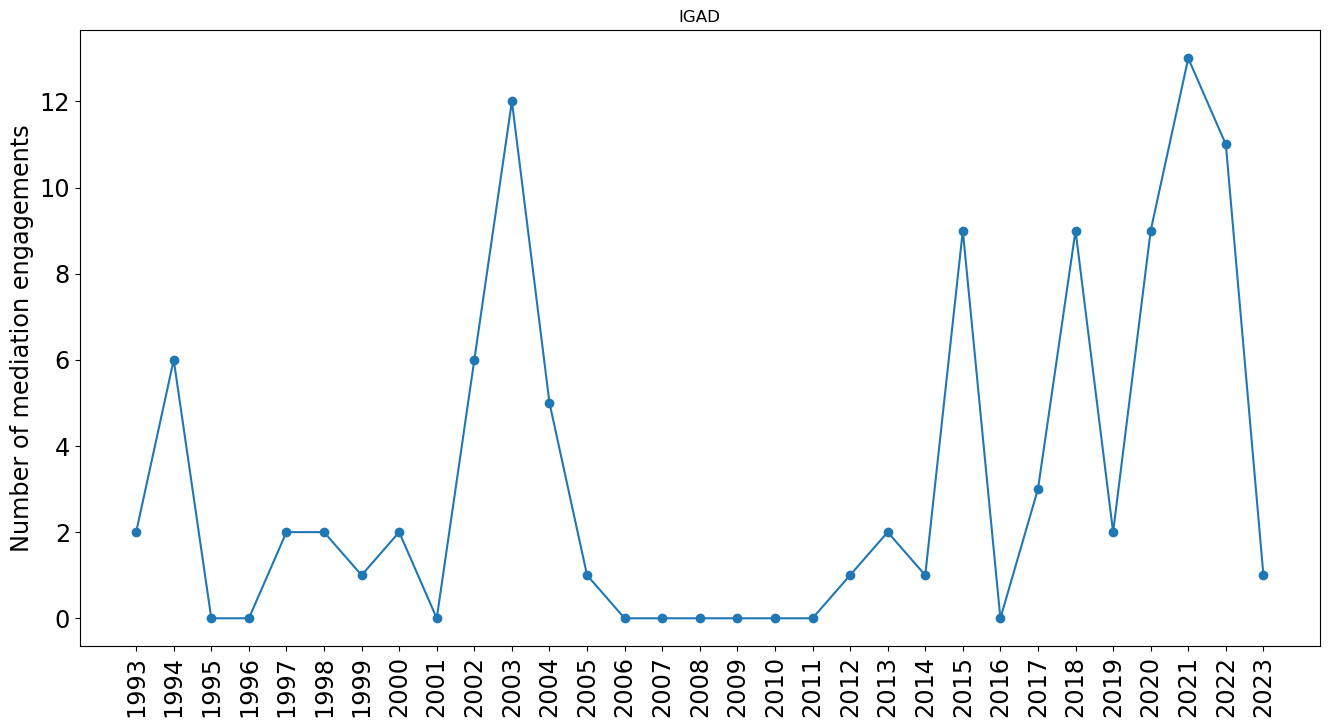

In [17]:
years = sorted(list(set([int(t[2]) for t in mediation_data])))

year_range = list(range(min(years),max(years)+1,1))

year_counts = [0]*len(year_range)

for data in mediation_data:
    year = int(data[2])
    edge_dict = recover_edge_dict(t[1],len(get_empty_edge_dict()))
    values = list(edge_dict.values())
    #for i,v in enumerate(values):
    year_counts[year_range.index(year)] += 1

print()
print('Total mediation engagements:',sum(year_counts))

f = plt.figure(figsize=(16,8))
plt.plot(year_range,year_counts)
plt.scatter(year_range,year_counts)
plt.xticks(year_range,year_range,fontsize='xx-large',rotation=90)
plt.yticks(fontsize='xx-large')
plt.ylabel('Number of mediation engagements',fontsize='xx-large')
plt.title(actor_id)
plt.show()

### Role-year matrix

(9, 31)
Total mediation roles: 296



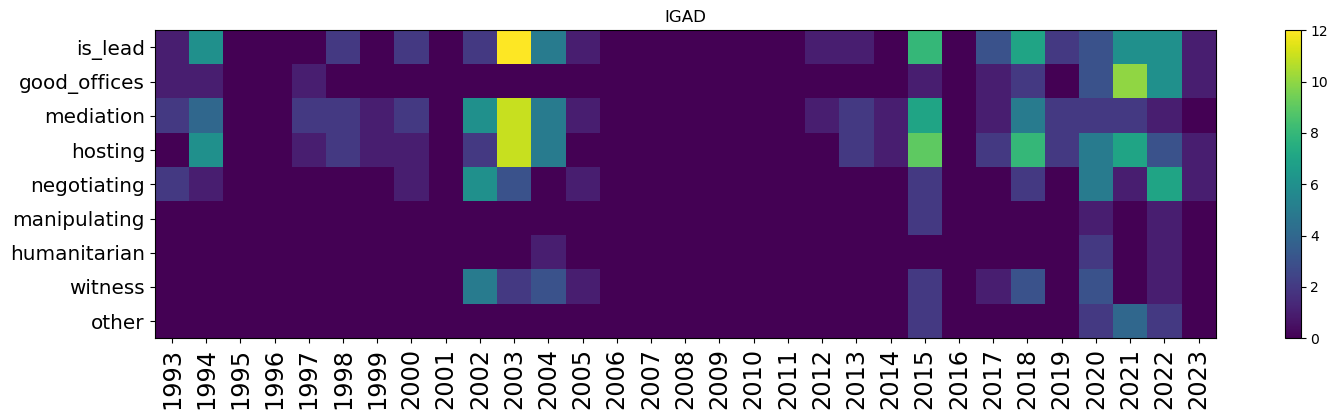

In [18]:
role_year_matrix = np.zeros([len(get_empty_edge_dict()),len(year_range)]).astype(np.int_)

for t in mediation_data:
    year = int(t[2])
    col_index = year_range.index(year)
    
    edge_dict = recover_edge_dict(t[1],len(get_empty_edge_dict()))
    values = list(edge_dict.values())
    for i,v in enumerate(values):
        if int(v) > 0:
            role_year_matrix[i,col_index] += 1

print(role_year_matrix.shape)

k = 0
for row in role_year_matrix:
    for v in row:
        k+=v
print('Total mediation roles:',k)
print()
        
f = plt.figure(figsize=(18,4))
plt.imshow(role_year_matrix)
plt.colorbar()
plt.yticks(range(0,len(role_keys)),role_keys,fontsize='x-large')
plt.xticks(range(0,len(year_range)),year_range,fontsize='xx-large',rotation=90)
plt.title(actor_id)
plt.show()



## Mediation data

### Actors engaged in a mediation

In [19]:
mediation_id = '10'
mediation_index = data_dict['mediation_vertices'].index(mediation_id)
mediation_data = data_dict['vertices_dict'][mediation_id]['data']

print(mediation_id,mediation_data)
print()

row = data_dict['matrix'][mediation_index]
for i,v in enumerate(row):
    if v > 0:
        edge_dict = recover_edge_dict(v,len(get_empty_edge_dict()))
        print(data_dict['actor_vertices'][i],edge_dict)
        


10 {'year': '1994', 'conflict_locale': 'Sudan', 'neg_location': 'Kenya', 'neg_type': 'R'}

Eritrea {'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}
Ethiopia {'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}
IGAD {'is_lead': '1', 'good_offices': '0', 'mediation': '1', 'hosting': '1', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}
Kenya {'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '1', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}
Uganda {'is_lead': '0', 'good_offices': '0', 'mediation': '1', 'hosting': '0', 'negotiating': '0', 'manipulating': '0', 'humanitarian': '0', 'witness': '0', 'other': '0'}


## Data integrity checks

### Actor data

- Is the lead actor always part for the set of mediation

In [ ]:
actor_dict = {}

header = data_dict['header']
actor_vertices = data_dict['actor_vertices']

for i,row in enumerate(data_dict['data']):        
    mediation_id = row[header.index('mediation ID')]
    actor = row[header.index('third-party')].strip()
    if not actor in actor_vertices:
        print(mediation_id,actor)
    lead = row[header.index('leading actor')].strip()
    if not lead in actor_vertices:
        print('LEAD',mediation_id,lead)
    lead2 = row[header.index('leading actor 2')].strip()
    if len(lead2) > 0 and not lead2 in actor_vertices:
        print('LEAD2',mediation_id,lead2)
    lead3 = row[header.index('leading actor 3')].strip()
    if len(lead3) > 0 and not lead3 in actor_vertices:
        print('LEAD2',mediation_id,lead3)


### Mediation data

In [ ]:
# Check integrity of mediation data

mediation_dict = {}

header = data_dict['header']

for i,row in enumerate(data_dict['data']):
    mediation_id = row[header.index('mediation ID')]
    if not mediation_id in mediation_dict:
        mediation_dict[mediation_id] = {}
        mediation_dict[mediation_id]['year'] = []
        mediation_dict[mediation_id]['conflict_locale'] = []
        mediation_dict[mediation_id]['conflict_sublocale'] = []
        mediation_dict[mediation_id]['negotiation_location'] = []
        mediation_dict[mediation_id]['negotiation_type'] = []
    
    year = row[header.index('year')]
    if not year in mediation_dict[mediation_id]['year']:
        mediation_dict[mediation_id]['year'].append(year)
    locale = row[header.index('conflict locale')]    
    if not locale in mediation_dict[mediation_id]['conflict_locale']:
        mediation_dict[mediation_id]['conflict_locale'].append(locale)
    sublocale = row[header.index('conflict sub-locale')]    
    if not sublocale in mediation_dict[mediation_id]['conflict_sublocale']:
        mediation_dict[mediation_id]['conflict_sublocale'].append(sublocale)
    location = row[header.index('location of neogitations')]    
    if not location in mediation_dict[mediation_id]['negotiation_location']:
        mediation_dict[mediation_id]['negotiation_location'].append(location)
    ntype = row[header.index('negotiation type')]    
    if not ntype in mediation_dict[mediation_id]['negotiation_type']:
        mediation_dict[mediation_id]['negotiation_type'].append(ntype)
    
# Do any lists have multiple values
for k,inner in mediation_dict.items():
    for l,v in inner.items():
        if len(v) > 1:
            print(k,l,v)

